In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as consts
from matplotlib.ticker import FormatStrFormatter

import matplotlib
matplotlib.rc('font', size=18)

In [3]:
R = 2
Rcrit = 9.4
v = 30 * 10**3
e0 = 1
w0 = 235.7*10**3

In [4]:
L = Rcrit / (2 * w0)
C = 1 / (L * w0**2)
gamma = R / (2*L)
Q = w0 / (2*gamma)
print(f"L: {L}")
print(f"C: {C}")
print(f"gamma: {gamma}")
print(f"Q: {Q}")

L: 1.99406024607552e-05
C: 9.026981648146309e-07
gamma: 50148.936170212764
Q: 2.35


In [7]:
def Z(w):
    return np.sqrt(R**2 + (L*w - 1/(w*C))**2)
def ImZ(w):
    return L*w - 1/(w*C)
def ReZ(w):
    return R

wres = w0
print(f"Iomax: {e0 / Z(wres)}")

Iomax: 0.5


/home/shov/PyEnvs/PhysicsLabs/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


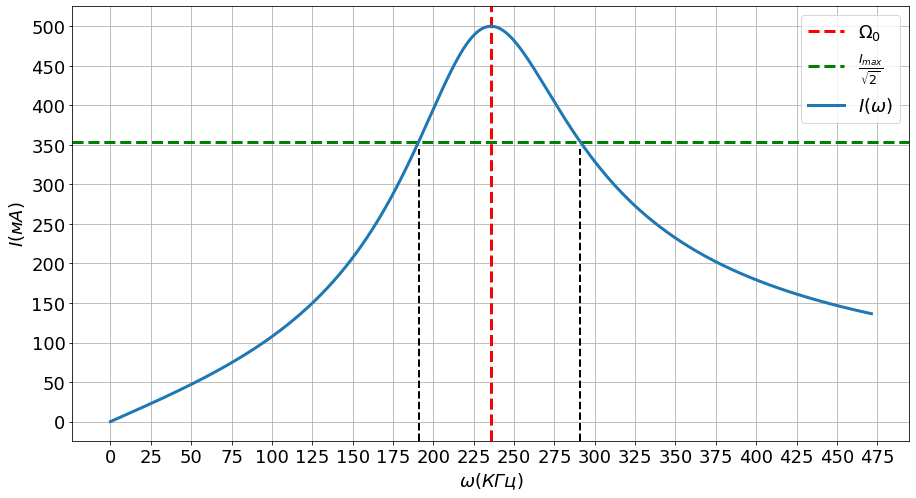

In [108]:
plt.figure(figsize = (15,8))
plt.ylabel("$I(мA)$")
plt.xlabel("$\omega(КГц)$")
plt.grid()


w = np.arange(0.1, 2 * wmax,1)
I = e0 / Z(w)

plt.xticks(np.arange(0,600,25))
plt.yticks(np.arange(0,525,50))

plt.axvline(wres * 10**-3, ymin=0, ymax=1, color='red', linestyle="--", linewidth = 3, label=r"$\Omega_0$")

plt.axhline(np.max(I) / np.sqrt(2) * 10**3, xmin=0, xmax=1, color='green', linewidth = 3, linestyle="--", label=r"$\frac{I_{max}}{\sqrt{2}}$")
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
index = (np.abs((I - (np.max(I) / np.sqrt(2))))).argsort()[:2]
deltaW = np.abs(index[0] - index[1])

for i in index:
    plt.axvline(np.argwhere(I == I[i])*10**-3, ymin=0, ymax=185/275, color='black', linestyle="--", linewidth = 2)

plt.plot(w * 10**-3, I * 10**3, '-', linewidth = 3, label = r"$I(\omega)$")
plt.legend(loc="best");
plt.savefig("Report/graphics/I(w).pdf")

In [6]:
print(f"Delta W: {deltaW}")

NameError: name 'deltaW' is not defined

In [5]:
def relative(teor, exper):
    return np.abs(teor - exper)/teor * 100

In [8]:
#Q_exper = w0 / deltaW
Q_exper = w0 / 98*10**-3
print(f"Q_exper: {Q_exper}")
print(f"Q Relative error: {relative(Q, Q_exper)}")

Q_exper: 2.4051020408163266
Q Relative error: 2.344767694311767


In [9]:
wv = 2*np.pi*v
print(f"Impedans on nu: {Z(wv)}")
phi = np.arctan(ImZ(wv)/ReZ(wv))
print(f"Delta phi: {phi} rad = {np.degrees(phi)}")

Impedans on nu: 2.9132743121714175
Delta phi: -0.8141141721415253 rad = -46.64530610549638


In [10]:
Ig = np.max(I) / np.sqrt(2)
eg = e0 / np.sqrt(2)
P = Ig * eg * np.cos(phi)
print(f"Ig: {Ig}")
print(f"eg: {eg}")
print(f"P: {P}")

NameError: name 'I' is not defined

In [11]:
U_C = -e0 / (wv*C * Z(wv))
U_L = (e0 * L * wv) / Z(wv)
U_R = (e0 * R) / Z(wv)
print(U_C)
print(U_L)
print(U_R)

-2.0173206675750968
1.2902029157461028
0.6865127638836366


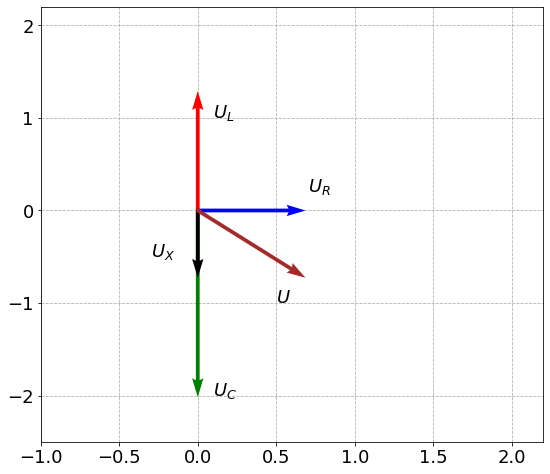

In [189]:
plt.figure(figsize = (9,8))
plt.xlim(-1, 2.2)
plt.ylim(-2.5, 2.2)

plt.quiver([0,0], [0,0], [0,U_R], [0, 0], angles="xy", scale_units="xy", scale=1, color='blue', zorder=2)
plt.text(0.7,0.2, r"$U_R$")

plt.quiver([0,0], [0,0], [0,0], [0, U_L], angles="xy", scale_units="xy", scale=1, color='red', zorder=2)
plt.text(0.1,1, r"$U_L$")

plt.quiver([0,0], [0,0], [0,0], [0, U_C], angles="xy", scale_units="xy", scale=1, color='green', zorder=2)
plt.text(0.1,-2, r"$U_C$")

plt.quiver([0,0], [0,0], [0,0], [0, U_C+U_L], angles="xy", scale_units="xy", scale=1, color='black', linewidth=4, zorder=3)
plt.text(-0.3,-0.5, r"$U_X$")

plt.quiver([0,0], [0,0], [0,U_R], [0, U_C+U_L], angles="xy", scale_units="xy", scale=1, color='brown', linewidth=4, zorder=4)
plt.text(0.5,-1, r"$U$")

plt.grid(linestyle="--", zorder=-3)

plt.savefig("Report/graphics/vectorDiagramm.pdf")

In [9]:
wresC = np.sqrt(w0**2 - 2*gamma**2)
eC = e0 / (Z(wresC) * wresC * C)
print(f"wresC: {wresC}")
print(f"eC: {eC}")
print(f"{relative(w0, wresC)}")

wresC: 224776.90807107356
eC: 2.4050683897183425
4.634319868021401


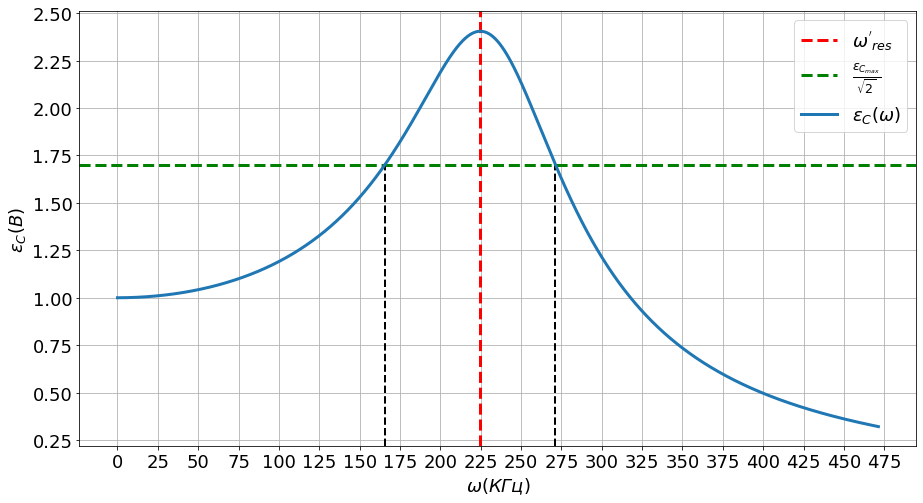

In [204]:
plt.figure(figsize = (15,8))
plt.ylabel(r"$\varepsilon_C(B)$")
plt.xlabel("$\omega(КГц)$")
plt.grid()

w = np.arange(0.1, 2 * wmax,1)
E = e0 / (Z(w) * w * C)

plt.xticks(np.arange(0,600,25))
plt.yticks(np.arange(0,3,0.25))

plt.axvline(wresC * 10**-3, ymin=0, ymax=1, color='red', linestyle="--", linewidth = 3, label=r"${{\omega}^{'}}_{res}$")

plt.axhline(np.max(E) / np.sqrt(2), xmin=0, xmax=1, color='green', linewidth = 3, linestyle="--", label=r"$\frac{\varepsilon_{C_{max}}}{\sqrt{2}}$")
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
index = (np.abs((E - (np.max(E) / np.sqrt(2))))).argsort()[:2]
deltaWC = index[0] - index[1]

for i in index:
    plt.axvline(np.argwhere(E == E[i])*10**-3, ymax=180/275, color='black', linestyle="--", linewidth = 2)


plt.plot(w * 10**-3, E, '-', linewidth = 3, label = r"$\varepsilon_C(\omega)$")
plt.legend(loc="best")
plt.savefig("Report/graphics/EC(w).pdf")

In [13]:
QC_exper = wresC / 98*10**-3
print(f"QC_exper: {Q_exper}")
print(f"QC Relative error: {relative(Q, Q_exper)}")

QC_exper: 2.4051020408163266
QC Relative error: 2.344767694311767
